# Analyse des mots-clés
Détection des mots clés les plus surreprésentés à des préiodes précises dans les questions et/ou les titres des lettres

## Variables utilisées

In [1]:
# Importation des utilitaires
from operator import or_
from functools import reduce
from itertools import chain
from wordcloud import WordCloud 

In [2]:
# Imortation des fonctions de détection des périodes
%run anomalies_fct.ipynb

In [3]:
# Importation des fonctions d'analyse des mots cles
# La bibiliothèque de stemmatisation est longue à charger
%run analyse_mots_fct.ipynb 

# Exemple d'étude avec le TF-IDF

In [4]:
# On choisi le thème qu'on va observer
theme_choisi = 'chambres consulaires'

# Le data_frame constitué des questions de ce thème
dft = questions_df[questions_df.rubrique==theme_choisi].set_index('date_question').sort_values('date_question')
dft.head() #DataFramet

,date_reponse,groupe_auteur,ministere_adresse,question,rubrique,titre
date_question,,,,,,
2017-09-26,2017-12-12,LR,Ministère de l'économie et des finances,M. Jean-Jacques Gaultier appelle l'attention d...,chambres consulaires,Ressources fiscales chambres de commerce
2017-10-03,2017-12-12,LR,Ministère de l'économie et des finances,M. Jean-Jacques Gaultier appelle l'attention d...,chambres consulaires,CCI - fonds de modernisation et de péréquation
2017-10-03,2017-12-12,LR,Ministère de l'économie et des finances,M. Vincent Descoeur attire l'attention de M. l...,chambres consulaires,Fonds de péréquation en faveur des chambres de...
2017-10-10,2017-12-12,MODEM,"Secrétariat d'État, auprès du ministre de l'éc...",M. Michel Fanget interroge M. le secrétaire d'...,chambres consulaires,Les ressources des CCI dans le cadre du projet...
2017-10-17,2017-12-26,LR,"Secrétariat d'État, auprès du ministre de l'éc...",M. Éric Pauget appelle l'attention de M. le se...,chambres consulaires,CCI : contre une diminution de la taxe pour fr...


In [5]:
# Choisir si on oberve les questions ou les titres :
support = 'question' # ou 'titre'

# Le data_frame de ce thème normalisé, 
dfN = normaliser(dft,stops,support=support) 
dfN.head() #DataFrameNormalisé

,date_reponse,groupe_auteur,ministere_adresse,question,rubrique,titre,taille
date_question,,,,,,,
2017-09-26,2017-12-12,LR,Ministère de l'économie et des finances,m. jean-jacques gaultier appeler attention m. ...,chambres consulaires,Ressources fiscales chambres de commerce,1028
2017-10-03,2017-12-12,LR,Ministère de l'économie et des finances,m. jean-jacques gaultier appeler attention m. ...,chambres consulaires,CCI - fonds de modernisation et de péréquation,1343
2017-10-03,2017-12-12,LR,Ministère de l'économie et des finances,m. vincent descoeur attire attention m. minist...,chambres consulaires,Fonds de péréquation en faveur des chambres de...,1132
2017-10-10,2017-12-12,MODEM,"Secrétariat d'État, auprès du ministre de l'éc...",m. michel fanget interroger m. secrétaire état...,chambres consulaires,Les ressources des CCI dans le cadre du projet...,2366
2017-10-17,2017-12-26,LR,"Secrétariat d'État, auprès du ministre de l'éc...",m. éric pauget appeler attention m. secrétaire...,chambres consulaires,CCI : contre une diminution de la taxe pour fr...,1343


In [6]:
# Concaténation du support étudié par semaine
dfNC = concatener(dfN,support=support)
dfNC.head() #DataFrameNormaliséConcaténé

,concatenation,taille,indice
date_question,,,
2017-09-26,m. jean-jacques gaultier appeler attention m. ...,1028,1028
2017-10-03,m. jean-jacques gaultier appeler attention m. ...,2475,3503
2017-10-10,m. michel fanget interroger m. secrétaire état...,2366,5869
2017-10-17,m. éric pauget appeler attention m. secrétaire...,3520,9389
2017-10-24,mme valérie bazin - malgras attire attention m...,6423,15812


In [7]:
# Excution du TF-IDF et obtention des scores pour chaque mot et  chaque semaine
scores = multi_scores(dfNC)
scores.head()

,000,021,022,092,10,100,107,11,110,112,...,éventuelle,évidence,éviter,évoluer,évolution,évolué,évoquer,événement,œuvre,œuvrer
date_question,,,,,,,,,,,,,,,,,,,,,
2017-09-26,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
2017-10-03,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.045917,0.000000
2017-10-10,0.04508,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.164969,0.0,0.000000,0.088974
2017-10-17,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.079261,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.041371,0.000000
2017-10-24,0.00000,0.0,0.0,0.0,0.030584,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.033553,0.0,0.021658,0.0,0.000000,0.0,0.023431,0.000000


In [8]:
# Dataframe associé aux nb mots avec les plus grands scores par semaine
nb = 5
prems = premiers_scores(scores,nb)
prems.head() #premiersMots-Clés

,0,1,2,3,4
date_question,,,,,
2017-09-26,amputer,industrie,participe,152,487
2017-10-03,péréquation,rural,situer,classer,commune
2017-10-10,réseau,entreprise,chef,évoquer,côté
2017-10-17,baisse,diminution,cci,tfc,pourcent
2017-10-24,taux,cci,région,projet,commerce


In [9]:
# On choisi une période qu'on va particulièrement étudier
# Ici on obtient la période du pic repéré pour cet thème
periode_choisie = pic_period(theme, pics_dates(theme_choisi)[0])

# On obtient ainsi les plus grands scores correspondant à la période
prems_period = prems[(scores.index > periode_choisie[0])& (scores.index<periode_choisie[1])]
prems_period # PremiersMotsDansLaPériode

Periode: 2018-05-29 00:00:00 2018-07-24 00:00:00


,0,1,2,3,4
date_question,,,,,
2018-06-05,cma,formalité,centre,total,métier
2018-06-12,engagement,national,2019,public,ressource
2018-06-19,engagement,national,2019,2018,public
2018-06-26,engagement,national,2019,2018,prendre
2018-07-03,engagement,national,2018,2019,chambre
2018-07-10,engagement,2019,national,ressource,2018
2018-07-17,engagement,national,cci,2019,2018


In [10]:
# Renvoie l'ensemble de tous les mots ayant été dans le top nb dans le dataframe premiers_mots
def ensemble_premiers_mots(premiers_mots,nb):
    return reduce(or_, [set(premiers_mots[numero].values) for numero in range(nb)])
    
# Renvoie le dataframe correspondant aux occurence des mots_a_observer dans le dfNC
def occurence_mots(mots_a_observer,dfNC):
    dfOM = pd.DataFrame([{
        mot:row.concatenation.count(mot) 
        for mot in mots_a_observer
    } 
    for index,row in dfNC.iterrows()])\
    .set_index(dfNC.index)
    return dfOM

# Renvoie le dataframe correspondant aux occurences proportionnelles des mots_a_observer dans le dfNC
def occurence_mots_proportion(mots_a_observer,dfNC):
    dfOM = pd.DataFrame([{
        mot:(row.concatenation.count(mot))/len(row.concatenation)
        for mot in mots_a_observer
    } 
    for index,row in dfNC.iterrows()])\
    .set_index(dfNC.index)
    return dfOM

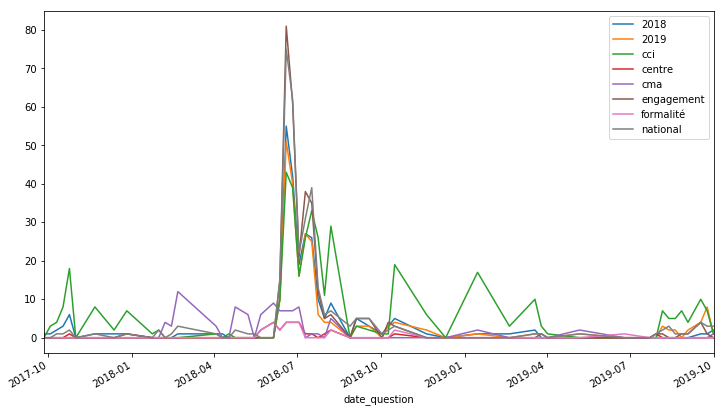

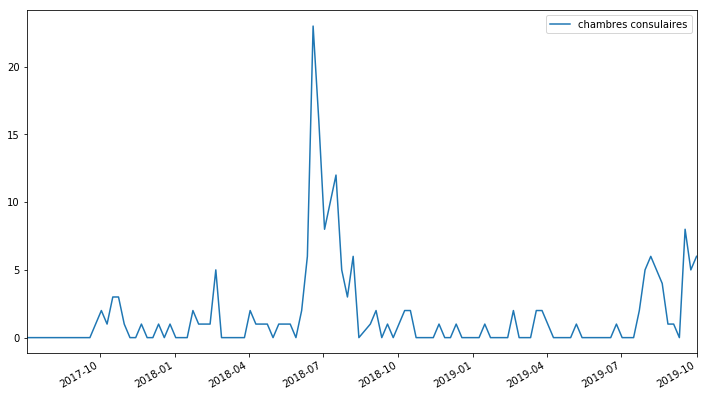

In [11]:
# On choisi les mots qu'on veut observer, ici les nb premiers 
nb_top = 3
ensemble_a_observer = ensemble_premiers_mots(prems_period,nb_top)

# On plot ensuite les occurences de ces mots
occurence_mots(ensemble_a_observer,dfNC).plot(figsize=(12,7))
count_df.plot(y=theme_choisi,figsize=(12,7))

# Pour une exécution rapide

Periode: 2019-01-15 00:00:00 2019-03-12 00:00:00
Periode: 2019-09-03 00:00:00 2019-09-17 00:00:00
Periode: 2018-06-12 00:00:00 2018-08-14 00:00:00
Periode: 2017-07-25 00:00:00 2017-08-22 00:00:00
Periode: 2018-05-29 00:00:00 2018-08-14 00:00:00
Periode: 2018-09-11 00:00:00 2018-11-06 00:00:00


,ecartAbs,moyenne
theme,,
sécurité routière,30.350427,4.649573
ministères et secrétariats d'État,28.145299,0.854701
professions de santé,23.256410,9.743590
agriculture,22.948718,7.051282
chambres consulaires,21.401709,1.598291
sécurité des biens et des personnes,21.153846,3.846154


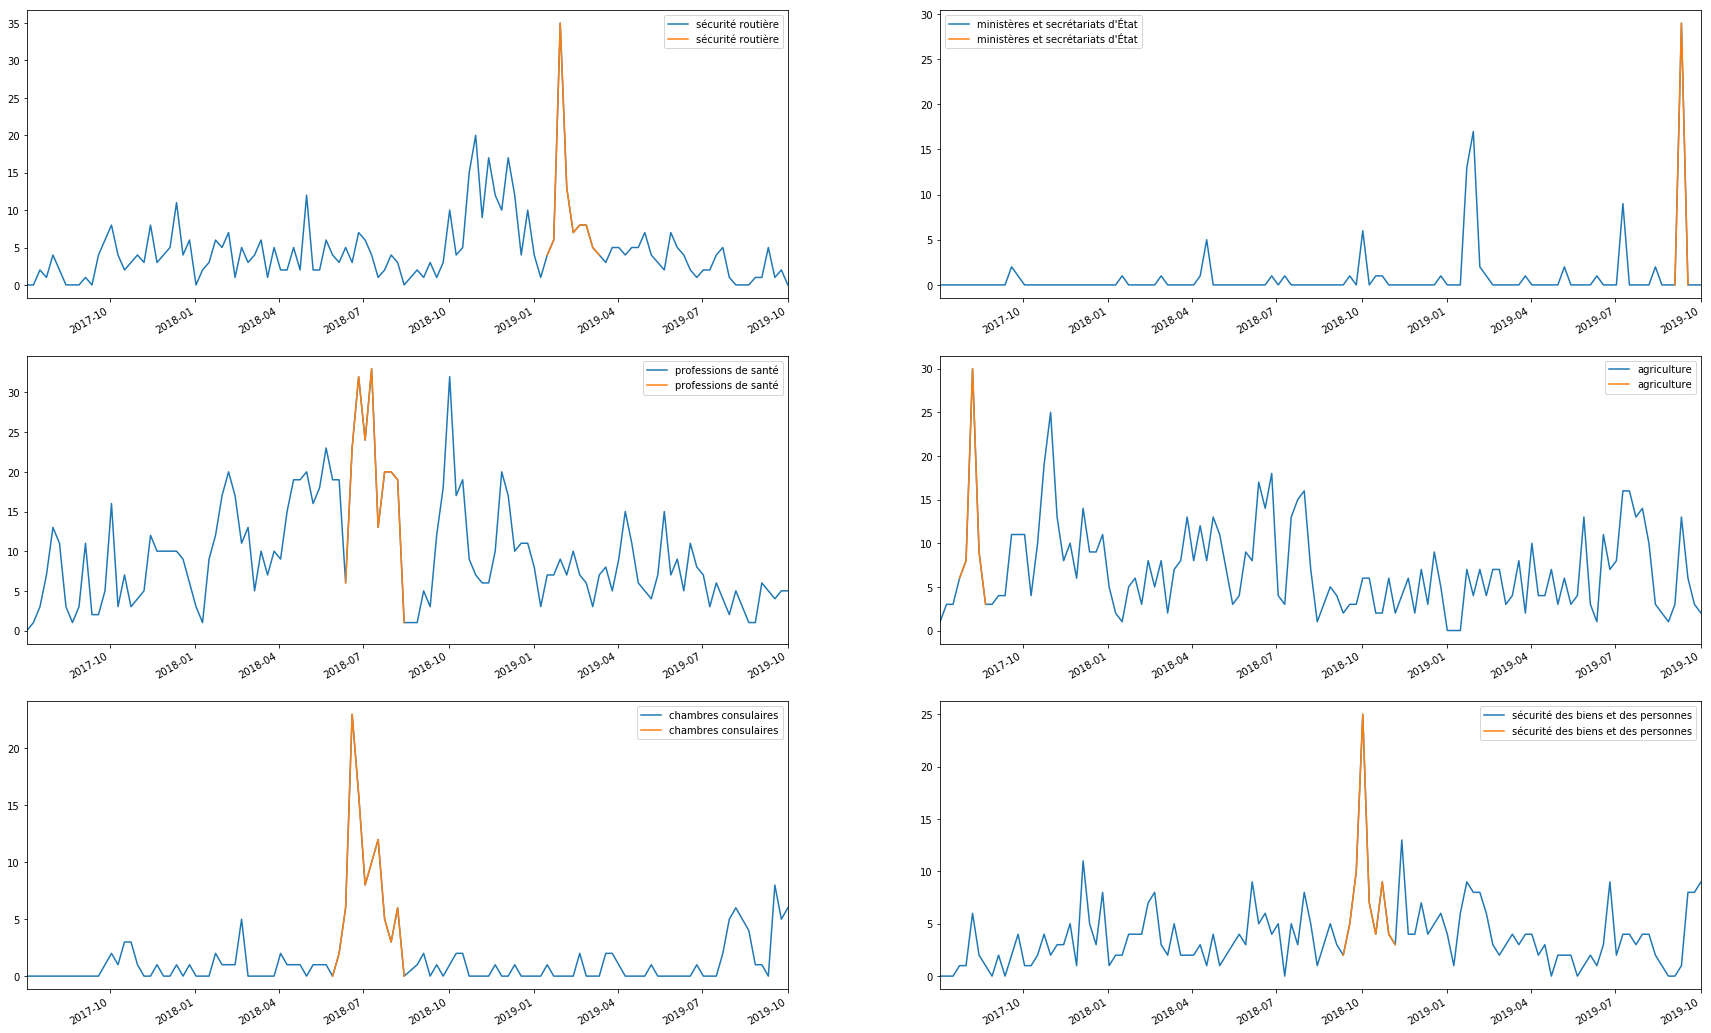

In [12]:
# On commence par repérer le thème voulu
reperage_themes(nb_to_show=6,m_meilleurs_themes='ecartAbs')

In [37]:
# On choisi le thème et le support 
theme_choisi = 'maladies'
support_choisi = 'question'

In [38]:
# Toutes les fonctions ci-dessus s'éxécutent
dft = questions_df[questions_df.rubrique==theme_choisi].set_index('date_question').sort_values('date_question')
dfN = normaliser(dft,stops,support=support_choisi)
dfNC = concatener(dfN,support=support_choisi)
scores = multi_scores(dfNC)
prems = premiers_scores(scores,5)
period = pic_period(theme, pics_dates(theme_choisi)[0])
debut, fin = period
prems_period = prems[(scores.index >= debut)& (scores.index<=fin)]
ensemble_a_observer = ensemble_premiers_mots(prems_period,3)

Periode: 2018-10-02 00:00:00 2018-10-09 00:00:00


Text(0.5, 0, '')

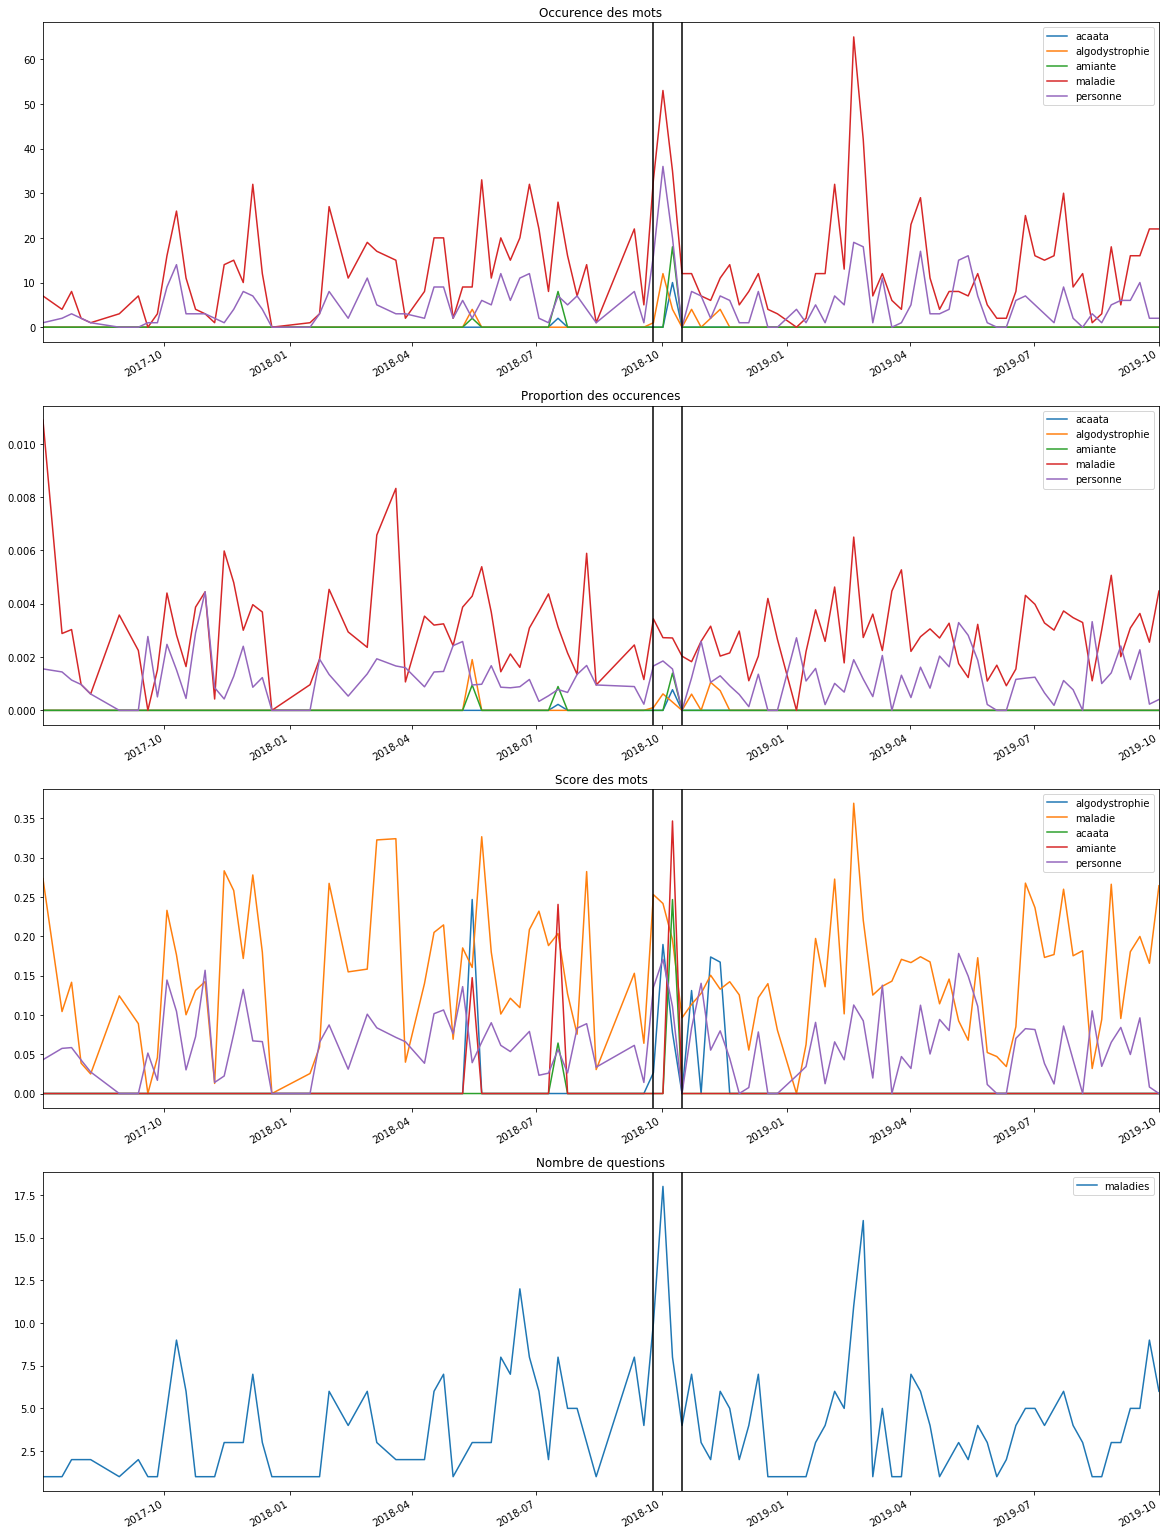

In [39]:
# On plot toutes les évolutions

fig, axes = plt.subplots(4,1,figsize=(20,30))
ax = axes[0]
occurence_mots(ensemble_a_observer,dfNC).plot(title='Occurence des mots',ax=ax)
ax.axvline(debut-pd.Timedelta('7 days'),c='black')
ax.axvline(fin+ pd.Timedelta('7 days'),c='black')
ax.set_xlabel(None)

ax = axes[1]
occurence_mots_proportion(ensemble_a_observer,dfNC).plot(title='Proportion des occurences',ax=ax)
ax.axvline(debut-pd.Timedelta('7 days'),c='black')
ax.axvline(fin+ pd.Timedelta('7 days'),c='black')
ax.set_xlabel(None)

ax = axes[2]
ax = scores.plot(y=ensemble_a_observer,title='Score des mots',ax=ax)
ax.axvline(debut-pd.Timedelta('7 days'),c='black')
ax.axvline(fin+ pd.Timedelta('7 days'),c='black')
ax.set_xlabel(None)

ax = axes[3]
ax = count_df[count_df[theme_choisi]!=0].plot(y=theme_choisi,ax=ax,title='Nombre de questions')
ax.axvline(debut-pd.Timedelta('7 days'),c='black')
ax.axvline(fin+ pd.Timedelta('7 days'),c='black')
ax.set_xlabel(None)

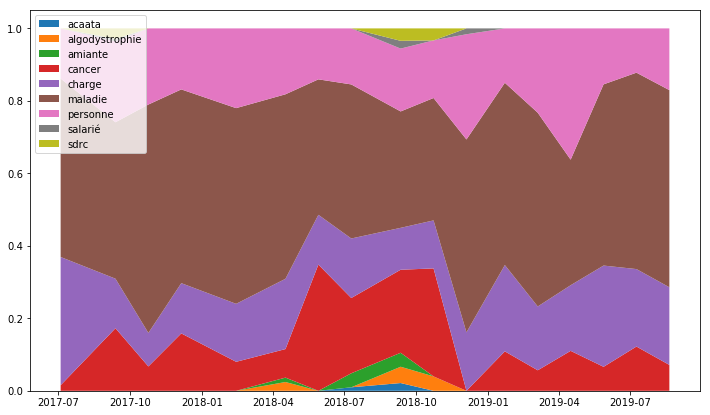

In [40]:
# Stackplot 
prems = premiers_scores(scores,5)
prems_period = prems[(scores.index >= debut)& (scores.index<=fin)]

# L'ensemble des mots qu'on veut observer
ensemble_a_observer = ensemble_premiers_mots(prems_period,5)

# Occurence de ces mots
occu = occurence_mots(ensemble_a_observer,dfNC)

# On regroupe par concaténation de k semaines
p=len(occu)
k = 6
group_week = sum([[prems.index[i*k] for j in range(k)] for i in range(p//k)],[prems.index[0] for i in range(p%k)])
occu['group_week'] = group_week
grou = occu.groupby('group_week').agg('sum').apply(lambda x: x/sum(x),axis=1)

# Plot
fig, ax = plt.subplots(figsize=(12,7))
ax.stackplot(grou.index,grou.T,labels = grou.columns)
ax.legend(loc='upper left')
plt.show()

In [20]:
grou

,80,accidentologie,bilan,donnée,forfait,heure,kilomètre,portion,sécurité
group_week,,,,,,,,,
2017-07-18,0.000000,0.000000,0.030303,0.030303,0.000000,0.242424,0.030303,0.000000,0.666667
2017-09-26,0.000000,0.030303,0.030303,0.000000,0.030303,0.272727,0.151515,0.000000,0.484848
2017-11-07,0.114286,0.047619,0.047619,0.000000,0.009524,0.228571,0.352381,0.019048,0.180952
2017-12-19,0.141026,0.012821,0.006410,0.000000,0.000000,0.282051,0.301282,0.012821,0.243590
2018-02-06,0.128788,0.053030,0.045455,0.007576,0.000000,0.265152,0.303030,0.053030,0.143939
2018-03-20,0.118421,0.026316,0.026316,0.000000,0.065789,0.263158,0.210526,0.013158,0.276316
2018-05-01,0.108696,0.010870,0.032609,0.021739,0.000000,0.206522,0.206522,0.010870,0.402174
2018-06-12,0.090909,0.000000,0.025974,0.025974,0.025974,0.285714,0.272727,0.025974,0.246753
2018-07-24,0.207317,0.000000,0.000000,0.000000,0.036585,0.353659,0.353659,0.000000,0.048780


# World Cloud
Génération d'un nuage de mots 

In [21]:
# On choisi  un thème, un support 
theme_choisi = 'sécurité routière'
support_choisi = 'question'
parti = 'LR'
# Et une date sur lequel  va s'effectuer le word_cloud
# -> ici, la date du pic repéré
date = pics_dates(theme_choisi)[0]

In [25]:
# On obtient le dataframe scores des scores des mots 
dft = questions_df[questions_df.rubrique==theme_choisi].set_index('date_question').sort_values('date_question')
dfN = normaliser(dft,stops,support=support_choisi)
dfNC = concatener(dfN,support=support_choisi,parti = parti)
scores = multi_scores(dfNC)

In [28]:
dfN.head()

,date_reponse,groupe_auteur,ministere_adresse,question,rubrique,titre,taille
date_question,,,,,,,
2017-07-18,2017-09-26,LR,Ministère de l’intérieur,mme véroniqu louwagie appeler attention m. min...,sécurité routière,Sécurité routière-avis de contravention-désign...,1225
2017-07-18,2018-04-24,LR,Ministère de l’intérieur,m. martial saddier attire attention m. ministr...,sécurité routière,Inquiétude des professionnels des écoles de co...,1184
2017-07-25,2018-04-24,LAREM,Ministère de l’intérieur,m. philippe folliot attire attention m. minist...,sécurité routière,Établissements d'enseignement de la conduite,1514
2017-08-01,2017-10-31,LAREM,Ministère de l’intérieur,m. hervé pellois appeler attention m. ministre...,sécurité routière,Réglementation du stationnement gênant sur les...,1139
2017-08-01,2018-04-24,LR,Ministère de l’intérieur,m. thibault bazin attire attention m. ministre...,sécurité routière,Ubérisation des écoles de conduite,772


In [29]:
dfN.groupby([dfN.index,'groupe_auteur']).agg({ support: lambda x: ' '.join(x),'taille': lambda y:np.sum(y)}).rename({support:'concatenation'},axis=1)

concatenation  \
date_question groupe_auteur                                                      
2017-07-18    LR             mme véroniqu louwagie appeler attention m. min...   
2017-07-25    LAREM          m. philippe folliot attire attention m. minist...   
2017-08-01    LAREM          m. hervé pellois appeler attention m. ministre...   
              LR             m. thibault bazin attire attention m. ministre...   
              NI             m. jacques bompard interroger m. ministre état...   
2017-08-08    LAREM          m. frédéric barbier attire attention m. minist...   
              LR             m. maxime minot appeler attention m. ministre ...   
2017-09-05    LAREM          mme bérangère couillard interroger m. ministre...   
2017-09-19    LAREM          m. loïc dombreval attire attention m. ministre...   
              LR             m. guy teissier alerte m. ministre état , mini...   
              SOC            m. guillaume garot attire attention m. ministr...   
              UDI-A-I        mme lise magnier attire attention mme ministre...   
2017-09-26    LAREM          m. bertrand sorre appeler attention m. ministr...   
              LR             mme véroniqu louwagie attire attention m. mini...   
              UDI-A-I        m. pierre - yves bournazel interroger m. minis...   
2017-10-03    LAREM          m. yves daniel appeler attention m. ministre é...   
              LR             m. rémi delatte attire attention m. ministre é...   
              LT             m. paul molac attire attention m. ministre éta...   
              SOC            m. luc carvounas attire attention m. ministre ...   
              UDI-A-I        m. christophe naegelen appeler attention m. mi...   
2017-10-10    LR             m. jacques cattin appeler attention m. ministr...   
              LT             mme jeanine dubié attire attention m. ministre...   
              MODEM          mme michèle vaucouleurs attire attention mme m...   
2017-10-17    LAREM          m. philippe chalumeau , député indre - - loire...   
              MODEM          mme marguerite deprez - audebert attire attent...   
2017-10-24    LAREM          mme clair o' petit attire attention m. ministr...   
              LR             mme valérie beauvai attire attention m. minist...   
2017-10-31    LAREM          mme isabelle rauch attire attention m. ministr...   
              LR             m. pierre vatin appeler attention mme ministre...   
              UDI-A-I        m. stéphane demilly attire attention m. minist...   
...                                                                        ...   
2019-05-28    LAREM          mme jacqueline maquet interroger mme ministre ...   
              LR             m. jérôme nury attire attention m. ministre in...   
              MODEM          mme florence lasserre - david appeler attentio...   
2019-06-04    LAREM          mme mireille robert interroger m. ministre int...   
              SOC            mme sylvie tolmont alerte m. ministre intérieu...   
2019-06-11    LAREM          m. hervé pellois attire nouveau attention mme ...   
              LR             mme isabelle valentin alerte mme ministre , au...   
              UDI-A-I        m. joachim - forget interroger mme ministre , ...   
2019-06-18    LAREM          mme nathalie sarles attire attention m. minist...   
              LR             mme valérie lacroute attire attention mme mini...   
2019-06-25    LR             m. jean-louis thiériot attire attention mme ga...   
2019-07-02    LAREM          m. bertrand bouyx attire attention m. ministre...   
              LR             m. claude ganay interroger m. ministre intérie...   
2019-07-09    LAREM          mme olivia gregoire appeler attention m. minis...   
2019-07-16    LAREM          m. christophe euzet attire attention mme minis...   
              LR             m. sébastien leclerc attire attention mme mini...   
              MODEM          mme marielle sarne

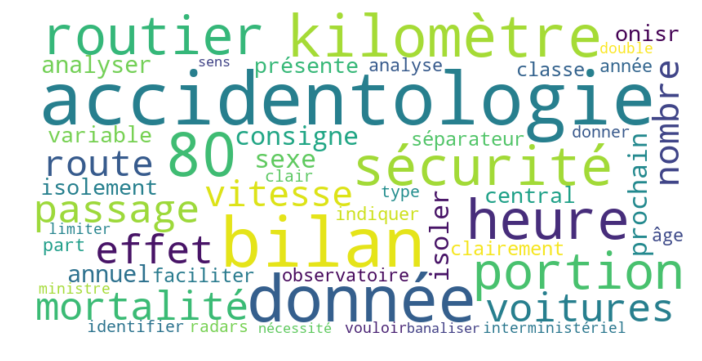

In [26]:
# Et on génère le WordCloud
wc = WordCloud(background_color="white", max_words=50,width=800,height=400)
wc.generate_from_frequencies(scores.loc[date])
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()